[(0.00000000e+00, 1.377215) (5.00000000e-02, 1.377215)
 (1.00000000e-01, 1.377215) ... (5.00499987e+01, 1.377215)
 (5.00999987e+01, 1.377215) (5.01499987e+01, 1.377215)]
[(0.00000000e+00, 1.226316) (5.00000000e-02, 1.226316)
 (1.00000000e-01, 1.226316) ... (5.00499987e+01, 1.226316)
 (5.00999987e+01, 1.226316) (5.01499987e+01, 1.226316)]
[(0.00000000e+00, 1.037648) (5.00000000e-02, 1.037648)
 (1.00000000e-01, 1.056471) ... (5.00499987e+01, 1.075357)
 (5.00999987e+01, 1.075357) (5.01499987e+01, 1.075357)]
[(0.00000000e+00, 0.9432825) (5.00000000e-02, 0.9432825)
 (1.00000000e-01, 0.9432825) ... (5.00499987e+01, 0.9432825)
 (5.00999987e+01, 0.9621678) (5.01499987e+01, 0.9621678)]
[(0.00000000e+00, 0.8489788) (5.00000000e-02, 0.8489788)
 (1.00000000e-01, 0.8489788) ... (5.00499987e+01, 0.8489788)
 (5.00999987e+01, 0.8489788) (5.01499987e+01, 0.8489788)]
[(0.00000000e+00, 0.7923843) (5.00000000e-02, 0.7923843)
 (1.00000000e-01, 0.7923843) ... (5.00499987e+01, 0.7923843)
 (5.00999987e+01, 0.

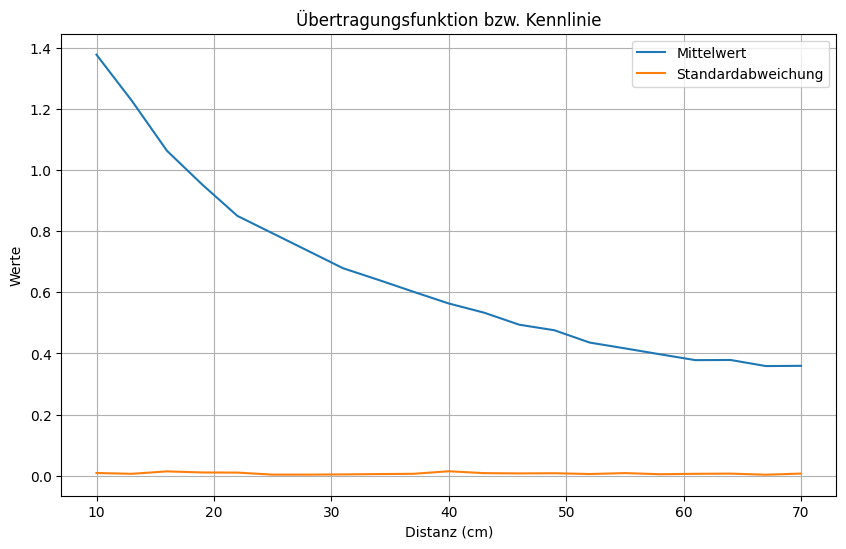

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

def process_measurement_data(folder_path, start_distance, end_distance, step):
    distances = []
    mean_values = []
    std_values = []

    for distance in range(start_distance, end_distance + 1, step):
        file_name = f"{distance}cm_modified.csv"
        file_path = os.path.join(folder_path, file_name)

        # Prüfen, ob die Datei existiert
        if not os.path.isfile(file_path):
            continue

        # Daten aus der CSV-Datei einlesen und überspringen der ersten Zeile
        data = np.genfromtxt(file_path, delimiter=';', skip_header=1, names=True)
        print(data)


        # Wählen Sie eine sinnvolle Anzahl von Messungen (z.B. die ersten 500)
        data = data[:500]

        # Berechnen Sie Mittelwert und Standardabweichung für den Kanal_A
        mean = np.mean(data['V'])
        std = np.std(data['V'])

        distances.append(distance)
        mean_values.append(mean)
        std_values.append(std)

    # Plotte die Ergebnisse
    plt.figure(figsize=(10, 6))
    plt.plot(distances, mean_values, label='Mittelwert')
    plt.plot(distances, std_values, label='Standardabweichung')
    plt.xlabel('Distanz (cm)')
    plt.ylabel('Werte')
    plt.legend()
    plt.title('Übertragungsfunktion bzw. Kennlinie')
    plt.grid(True)
    plt.show()

# Beispielaufruf der Funktion
process_measurement_data('/home/hermandi/Schreibtisch/hochschule/AIN3.1/SSS/InfrarotSensor/Messungen/', 10, 70, 3)
